# Assignment 2 #

---
**UT EID:**
1. ANMOL AGRAWAL   - aa96674 
2. AISHWARYA PARIDA - ap63595

### Due: Friday, September 22 to be submitted via Canvas by 11:59 pm ###
### Total points: **85** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

### Note that:
###1. Only one student per group needs to submit the assignment on Canvas;
###2. Make sure to include both students' names, UT EIDs and homework group number in your submitted notebook;
###3. Please make sure your code runs, the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)
### 4. Late submissions receive 0 points.

# Question 1: Bias and Variance (**10 pts**)

(a). (**4 pts**) Describe the difference between model bias and the bias of a point estimator.

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

### a) 
>Model Bias:
Model bias refres to the error introduced in the model by making overly simplistic assumptions about the underlyting data. These oversimplistic assumptions can lead to overlooking of important data patterns. This can lead to inaccurate predictions and cause the model to frequently overestimate or underestimate specific outcomes. A model with a higher bias does not closely fit the dataset. Due to the bias-variance tradeoff, a low bias model will closely match the training data set leading to overfitting but will not fit well with unseen test data. To reduce model bias, more complex models, more relevant data, or a new modeling approach that better matches the underlying data distribution might be used.

>Point Estimator:
Point Estimator is a function for estimating the value of a population parameter from random samples of the population.A point estimator's bias is defined as the expected difference between the estimator's average or expected value and the true population parameter being estimated. In other words, it quantifies how far the estimate deviates from the true value on average. Bias in a point estimator can be decreased or eliminated by applying alternative estimation methods or bias-corrected methods that modify the estimator's formula to make it unbiased.Unbiased estimators that have minimum variance are called best unbiased estimators.

>Model bias is evaluated in the context of predictive models whereas the bias of a point estimator is relevant when estimating parameters such as the mean or variance.

### b)
>Learning curves are useful for determining if a model overfits or underfits a given dataset for a particular sample size. Learning curves make it simple to see how training and test error change as model complexity increases.

>Initially, increasing the training data reduces training error because the model learns more about the data. The validation error is also plotted against the training data size to determine how effectively the model generalizes to new data. Initially, increasing the data size should reduce validation error because the model has more information to learn from. 

>Learning curves for an overfit model show a large gap between training and validation error with training error essentially moving towards zero as the dataset size increases and validation error becoming either remaing high or plateauing after a certain point.

>For Underfitting, the training error at the beginning gradually increases upon adding training examples and it may not reach a low level even with vast amounts of data. Adding more training data points lowers the validation error at first, then abruptly drops to a minimum for the validation learning curve. After this time, adding more training data points will not increase model performance.

# Question 2: Bias-Variance Exploration (**20 points**)
Consider a function $g$ such that $g(x)=2sin(\pi
x)cos(3\pi x^2)$. We will try to fit this function using a simple (binning based) piecewise constant function with varying number of bins. Here the number of bins controls the model complexity.

Note: problem below uses the statistics notation: target is y and your estimates are $y_{hat}$.


a) (2 points) Generate a dataset $(D = X,Y)$ by generating a set of 1-dimensional x's and y's in the following way -
*  $x_i = \frac{i}{2000}$ for each $i$ in $1, 2, 3 \ldots 2000$.
* Then, for each of the $x_i$'s obtain $y_i = 2sin(\pi x_i)cos(3\pi x_i^2)+ N(0,1)$ where $N(0,1)$ denotes the normal distribution with mean 0 and variance 1.

Create 10 such datasets by independently repeating the entire process 10 times. Plot any one of the generated datasets.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
def generate_data(num_points):
  x = np.arange(1, num_points + 1) / num_points
  ### START CODE ###
  # Compute y according to the labeling function g
  y = 2 * np.sin(np.pi * x) * np.cos(3 * np.pi * x**2) + np.random.normal(0, 1, num_points)  
  ### END CODE ###
  return x,y

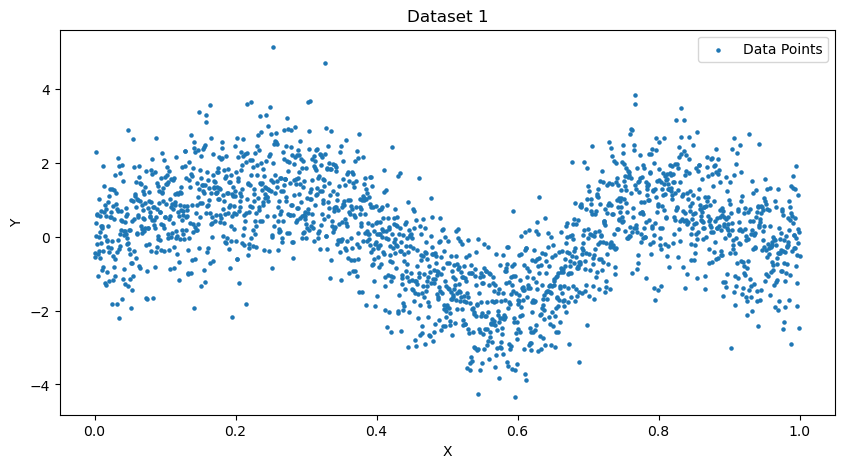

In [2]:
datasets = {}
for j in range(10):
  datasets[j] = {}
  datasets[j]['X'], datasets[j]['Y'] = generate_data(2000)

### START CODE ###
# Plot y v.s. x of any one of the dataset
dataset_to_plot = 0
X_plot, Y_plot = datasets[dataset_to_plot]['X'], datasets[dataset_to_plot]['Y']

plt.figure(figsize=(10, 5))
plt.scatter(X_plot, Y_plot, s=5, label='Data Points')
plt.title(f'Dataset {dataset_to_plot + 1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
### END CODE ###


b) (5 points) Consider an estimator of function $g$, $f(x)$ that divides the x's into $K$ bins such that there are $m = n/K$ data points in each bin and the predicted y for all points in that bin is the mean of all the $y$'s in the bin.
$$
f(x) = \sum_{j=1}^{K} \bar{y}_j \mathbb{1}(x \in \text{bin } j)
$$
where
$$
\bar{y}_j = \frac{1}{m}\sum_{i=j*m}^{(j+1)*m-1} y_i.
$$
Implement this estimator. Obtain $Y_{hat} = f(x)$ for one of the datasets created above by using $K=25$ and plot the predicted $Y_{hat}$ along with $X$ and $Y$.



In [3]:
### START CODE ###
# Implement Estimator
def binning_estimator(X, Y, K):
    num_samples = len(X)
    m = num_samples // K
    # Initialize Yhat as an empty array
    Yhat = np.empty_like(Y)
    # Calculate Yhat for each bin
    for j in range(K):
        start_idx = j * m
        end_idx = (j + 1) * m
        bin_mean = np.mean(Y[start_idx:end_idx])
        Yhat[start_idx:end_idx] = bin_mean
    return Yhat

chosen_dataset = datasets[0]

# Number of bins (K)
K = 25

# Extract X and Y from the chosen dataset
X = chosen_dataset['X']
Y = chosen_dataset['Y']

# Yhat using the binning estimator
Y_hat = binning_estimator(X, Y, K)

### END CODE ###

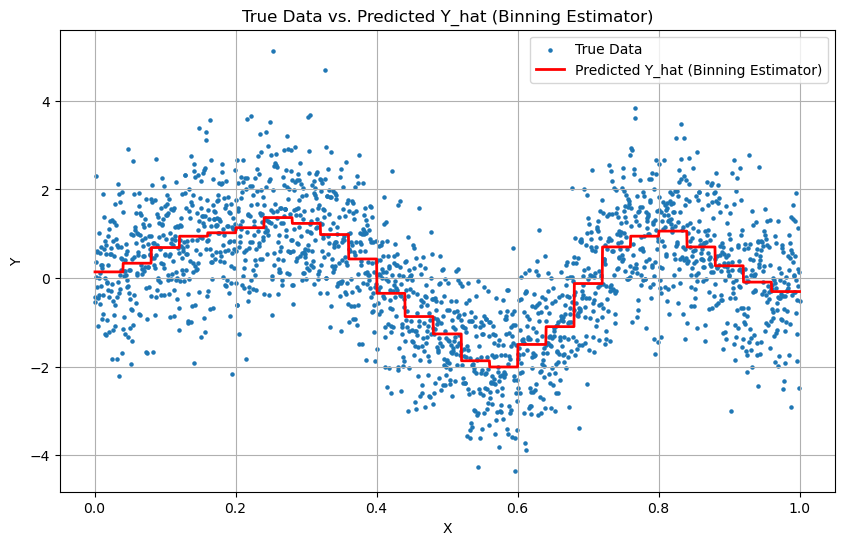

In [4]:
### START CODE ###
# Plot predicted y_{hat} along with X and Y
# Generate x values for plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, s=5, label='True Data')
plt.plot(X, Y_hat, color='red',lw =2, label='Predicted Y_hat (Binning Estimator)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('True Data vs. Predicted Y_hat (Binning Estimator)')
plt.grid(True)
plt.show()

### END CODE ###

c) (3 points) What do you think will happen to the MSE, the bias and the variance as the number of bins $K$ is increased?


MSE: Increasing the number of bins may initially result in a decrease in MSE. With additional bins, the piecewise constant estimator can more correctly capture the underlying function's fluctuations within smaller intervals, lowering the squared differences between the estimated and true values.

Bias: By increasing the number of bins K, bias can be reduced. Smaller bins enable a more flexible approximation of the underlying function, resulting in a better fit and, as a result, lower bias. 

Variance: By increasing the number of bins tends to increase variation. Because it fits the data more closely with more bins, the estimator becomes more sensitive to minor variations in the data. As a result, the predicted values within each bin may vary more.


d) (5 points) For each dataset, vary the number of bins $K \in \{2,5,10,25,50,100,250, 500, 1000\}$ and obtain the predictions. Also, for any one of the datasets (your choice), compute and plot the MSE obtained with varying $K$.

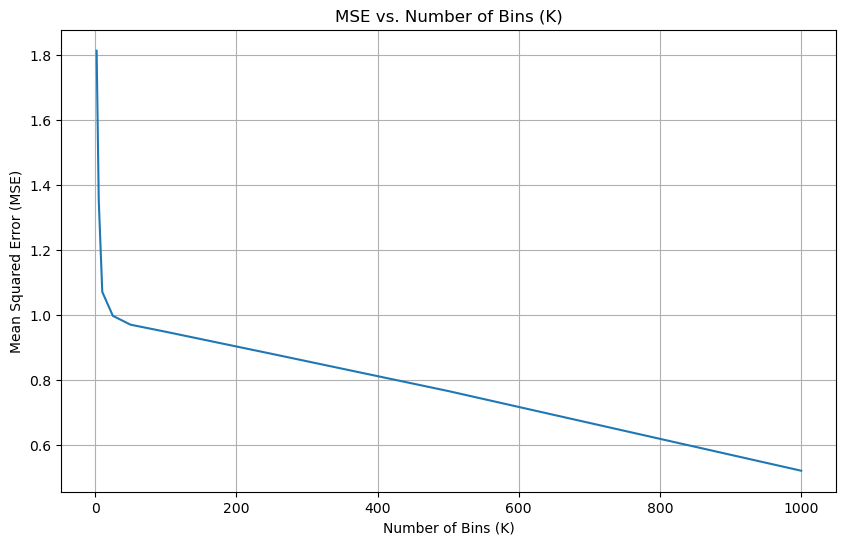

In [5]:
mse_scores = []
K = [2,5,10,25,50,100,250,500,1000]

chosen_dataset = datasets[0]
X = chosen_dataset['X']
Y = chosen_dataset['Y']

for n in K:
  ### START CODE ###
  # For the chosen dataset, compute y_hat
  Y_hat = binning_estimator(X, Y, n)
  ### END CODE ###

  ### START CODE ###
  # Compute MSE
  mse = np.mean((Y - Y_hat)**2)
  ### END CODE ###
  mse_scores.append(mse)
#plt.plot(K,mse_scores)
plt.figure(figsize=(10, 6))
plt.plot(K, mse_scores)
plt.xlabel('Number of Bins (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Bins (K)')
plt.grid(True)
plt.show()
plt.show()

e) (5 points) Recall the definitions of the bias and variance, and now given the predictions obtained from 10 different datasets, compute the (sample) bias and variance of the model for each of the $K \in \{2,5,10,25,50,100,250,500,1000\}$ and plot $K$  bias-squared vs $K$ and variance vs. $K$  on the same plot.
We are using the term "sample" to remember that bias/variance are "expected quantities" that we are approximating by considering only 10 models, one per dataset.

If y_pred denotes the 2000 x 10 2-D matrix of estimates for 2000 data points and obtained by the function estimated from the 10 datasets, use the following code to obtain the sample bias and variance.

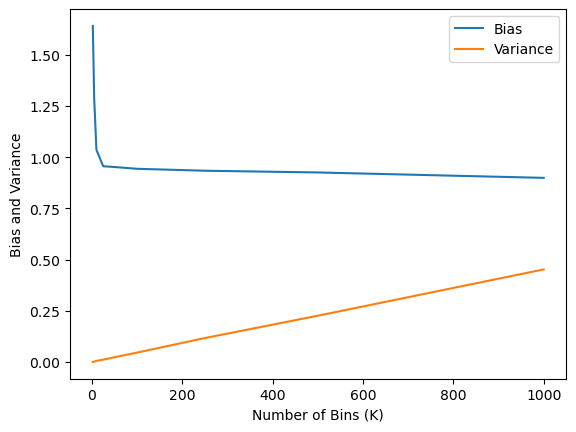

In [6]:
bias_vals = []
var_vals = []
K = [2,5,10,25,50,100,250,500,1000]
pred_y = np.zeros((len(datasets[0]['Y']),10)) # axis 0: number of data points, axis 1: number of datasets (10)

for n in K:
  for j in datasets.keys():
    x = datasets[j]['X']
    y = datasets[j]['Y']
    ### START CODE ###
    # Estimate y_{hat}
    y_hat = binning_estimator(x, y, n)
    ### END CODE ###
    pred_y[:,j] = y_hat

  ### START CODE ###
  # Compute the mean of the estimates over 10 datasets for each input x_{i}
  avg_yhat = np.mean(pred_y, axis=1) # 1D array of shape (2000,)
  # Compute the MSE between avg_yhat and y as bias
  bias = np.mean((avg_yhat - y)**2)
  # Compute the variance of the estimates over 10 datasets for each input x_{i}, then average over all inputs
  var_yhat = np.mean(np.var(pred_y, axis=1))
  ### END CODE ###
  bias_vals.append(bias)
  var_vals.append(var_yhat)
plt.plot(K, bias_vals, label='Bias')
plt.plot(K, var_vals, label='Variance')
plt.xlabel('Number of Bins (K)')
plt.ylabel('Bias and Variance')
plt.legend() 
plt.show()

# Question 3: Stochastic Gradient Descent Improvements (**10 pts**)

## Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.


#### Answer:
Stochastic Gradient Descent does not provide a smoother convergence of the loss function due to the randomness in selecting the data points for gradient calculation. 

Stochastic Gradient Decscent with momentum however leads to a faster and smoother convergence of the loss function because this algorithm takes the previous gradients into account by calculating the exponentially weighted average of these gradients. The alogorithm uses these weighted gradients to dampen the ossilations in the verical direction resulting into smoother convergence.

In simple terms, SGD with momentum utilises the previously calculated gradients to converge. By considering past gradients with exponentially weighted averages, momentum allows the algorithm to have a straight forward path to local optima and smoother updates.

Intuitively, having the direction the current gradient same as the previous gradients provides higher velocity/momentum to the convergence of loss function resulting to a faster convergence.

## Part 2. (**5 pts**) ##
Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent.


#### Answer:
In Mini-batch Stochastic Gradient Descent, batches of training data samples smaller than the actual dataset are created. For every batch, the sum of loss is calculated and then gradient is calculated as the partial derivative of loss wrt to the model parameters.

>1. One obvious advantage of Mini-batch Gradient Descent over Batch Gradient Descent is that the model updates frequently as we do not have to wait for the entire dataset to be evaluated.

>2. Another advantage is that the Mini batch stochastic gradient descent leads to an eficient use of memory. Since, losses from only a small batch of data are required to be stored at a time, this is computationaly more feasible.

>3. The selection of batches in Mini-batch stocastic gradient descent is random and this randomness can help to avoid shallow local minimas.

# Question 4: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates (assuming squared loss is being used as the cost function) for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$




##### Submitted as pdf labelled: AML Assignment 2 Q 4 Part A

## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [31]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        self.coef = self.coef-(self.learning_rate*gradient)
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                ### START CODE ###
                    error = y[i] - self.linearPredict(X[i])
                    error += self.regularization * np.dot(self.coef, self.coef)  
                ### END CODE ###

                # Compute gradients
                ### START CODE ###
                    gradient = -2 * error * X[i]
                    gradient += 2 * self.regularization * self.coef
                ### END CODE ###

                # Update weights
                ### START CODE ###
                    self.sgd(gradient)
                ### END CODE ###

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return np.dot(X,self.coef)
        ### END CODE ###

In [32]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [33]:
best_combinations = []
best_mse = float('inf')

# Create a list to store lowest MSEs for all combinations
mse_results = []

for learning_rate in learning_rate:
    for regularization_constant in regularization:
        model = Regression(learning_rate, regularization_constant, n_epochs)
        model.fit(X, y)
        mse = model.lowest_mse

        #lowest mse obtained for a set of learning rate and regularisation after all ephocs
        mse_results.append((learning_rate, regularization_constant, mse)) 
       

        if mse < best_mse:
            best_mse = mse
            best_combinations.append((learning_rate, regularization_constant))


# Print MSEs for all combinations
# # print("MSEs for all combinations:")
# for learning_rate, regularization_constant, mse in mse_results:
#     print(f"Learning Rate: {learning_rate}, Regularization Constant: {regularization_constant}, MSE: {mse}")

l=[]
for learning_rate, regularization_constant, mse in mse_results:
    if (learning_rate, regularization_constant) in best_combinations:
            l.append({'Learning Rate': learning_rate, 'Regularization Constant': regularization_constant, 'MSE': mse})
df = pd.DataFrame(l) 
df.sort_values(by='MSE', inplace=True)
df.index = [0, 1, 2]


print("Best two MSEs are obtained for combinations:")
best_two_combinations=df.iloc[:2]
best_two_combinations.head()


/var/folders/78/vkblh4vj27d5k_r_t8cffl480000gn/T/ipykernel_2967/719830231.py:31: RuntimeWarning: invalid value encountered in double_scalars
  error += self.regularization * np.dot(self.coef, self.coef)


Best two MSEs are obtained for combinations:


,Learning Rate,Regularization Constant,MSE
0,0.010,0,0.027445
1,0.001,0,0.028842


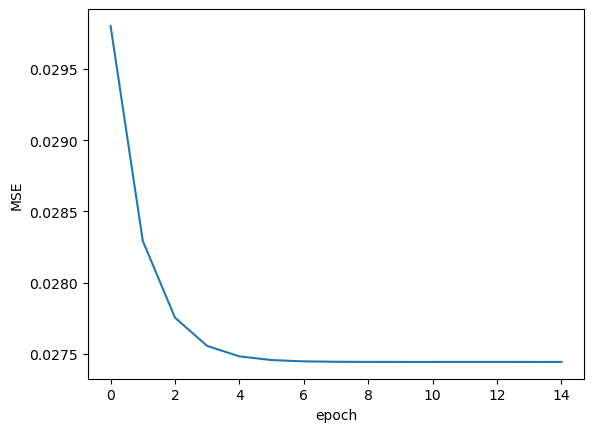

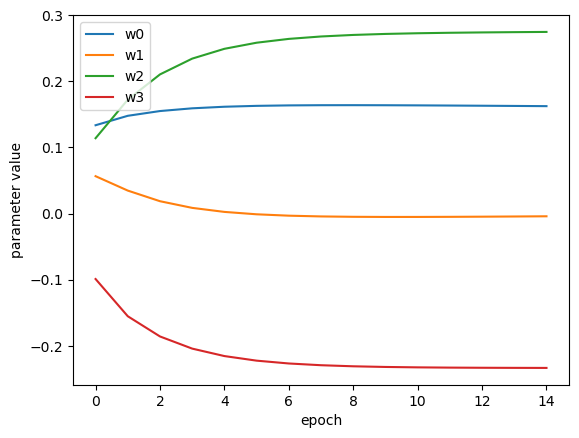

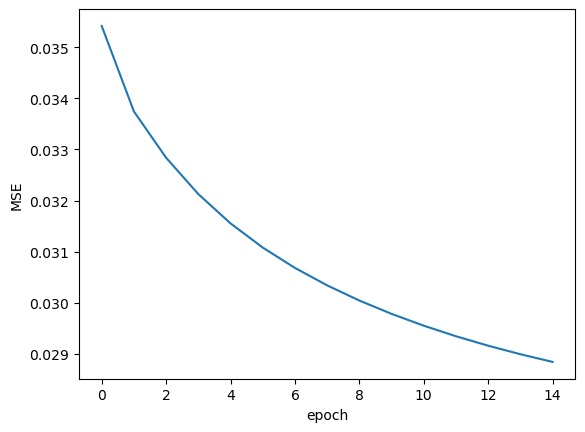

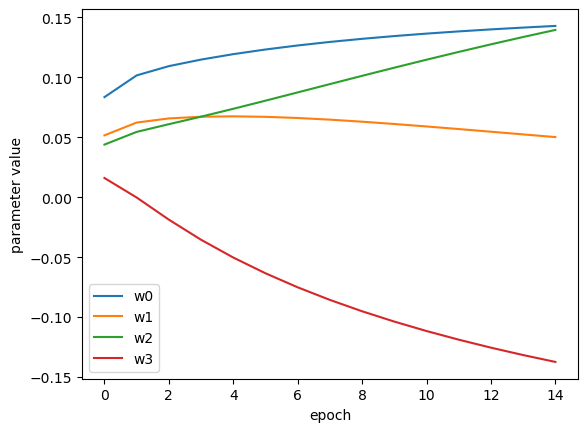

In [34]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (15 epochs)
### START CODE ###
for index, row in best_two_combinations.iterrows():
    learning_rate = row["Learning Rate"]
    regularization_constant = row["Regularization Constant"]

    # Create and fit the model
    model = Regression(learning_rate, regularization_constant, n_epochs)
    model.fit(X, y, plot=True)

### END CODE ###

# Question 5: Visualizing Gradient Descent (**15 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four batch update steps of gradient descent for a  linear regression model with two parameters (i.e. weights, indicated by $\theta$).

The true target function is $t = \theta_{0} + \theta_{1}x$ with $\theta_{0}=2$ and $\theta_{1}=0.5$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=-4$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations or settings to consider in total. For each setting, you will plot (a) the data and the changing linear regression fit and (b) the model parameters moving in the weight space after every update.

In [24]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [25]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

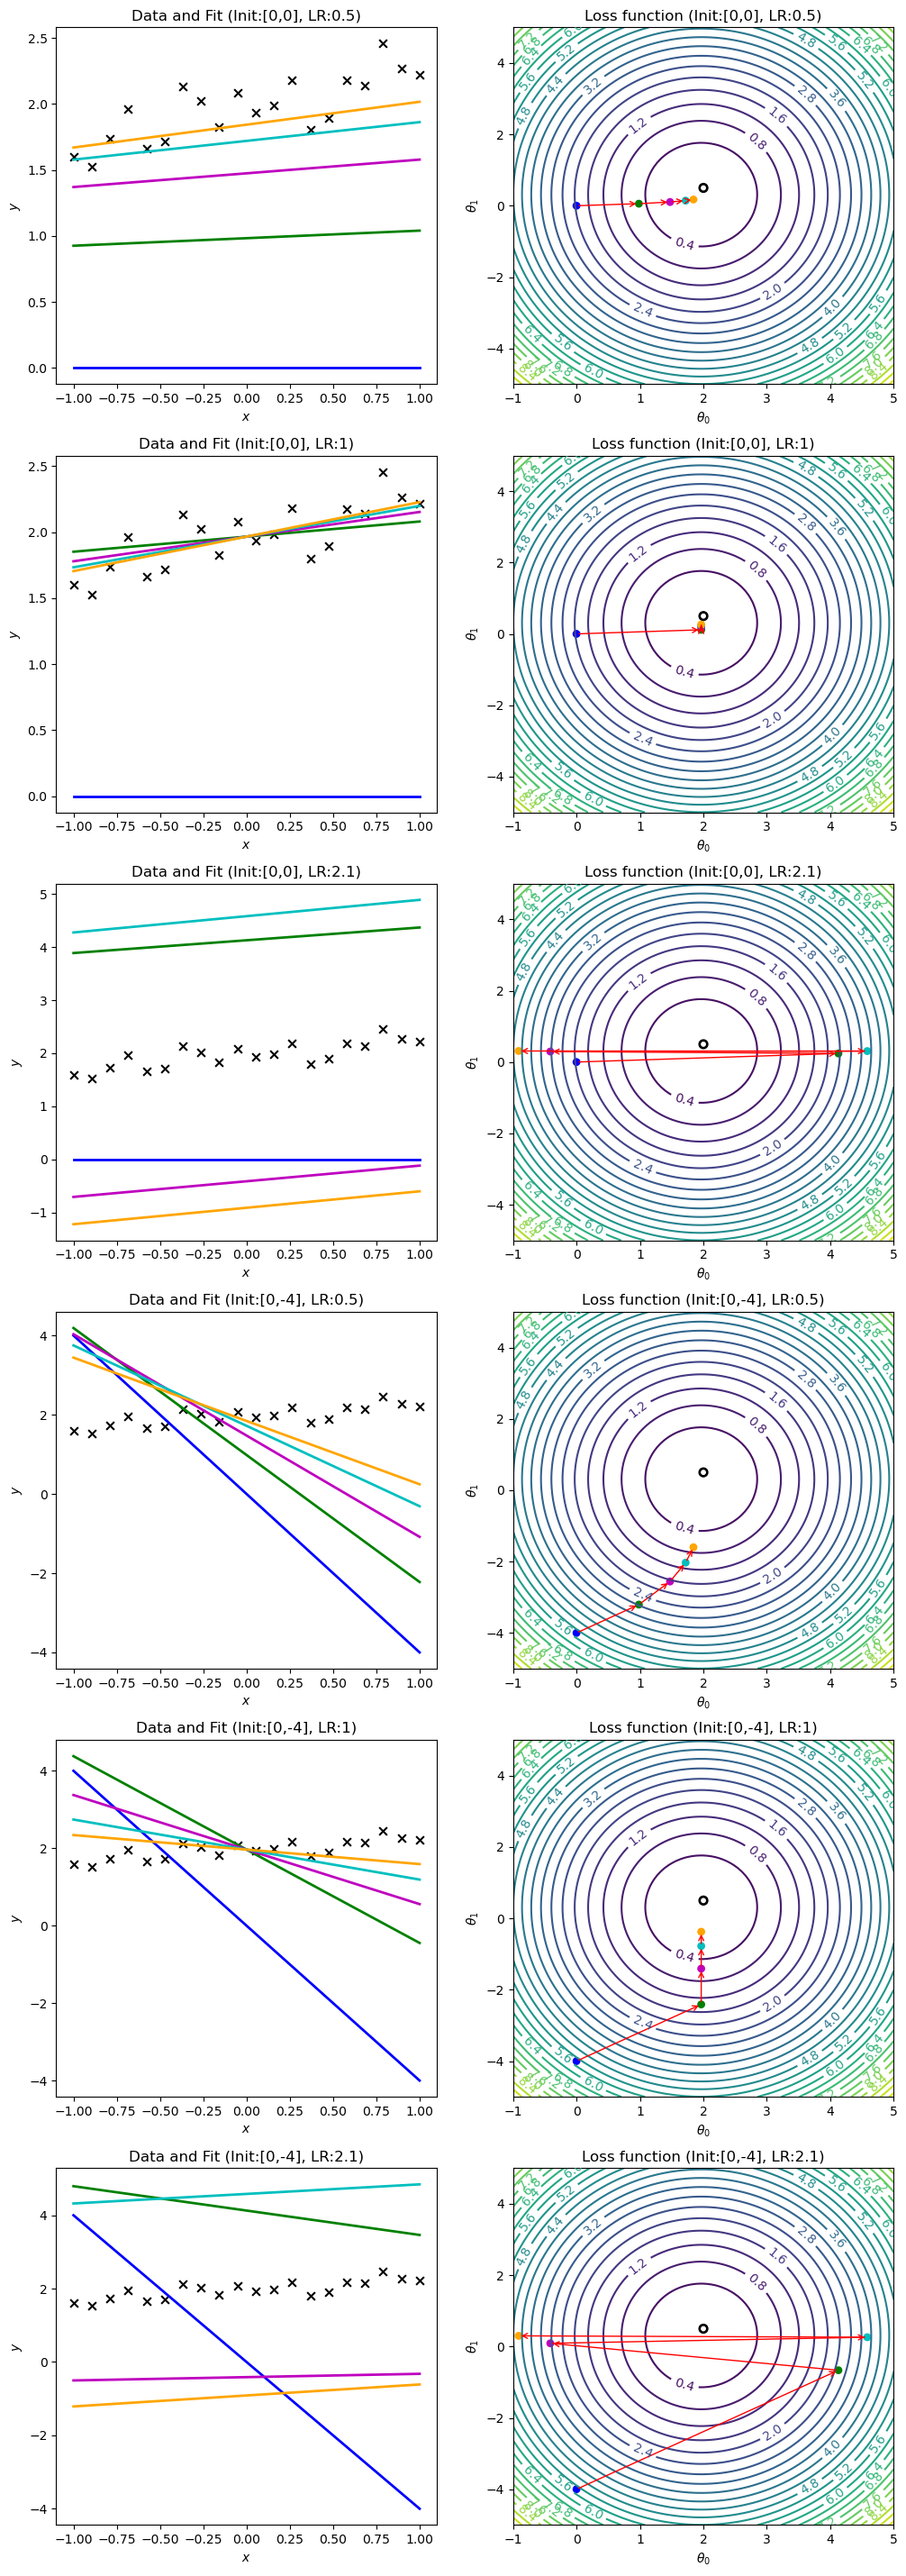

In [26]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [[0,0], [0,-4]]
lr_list = [0.5,1,2.1]
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-1,5,101)
        theta1_grid = np.linspace(-5,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            this_theta[0] = last_theta[0] - lr * np.average((model(x, *last_theta) - y))
            this_theta[1] = last_theta[1] - lr * np.average((model(x, *last_theta) - y) * x)
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

## Part 2. **(5 pts)** ##
For the experiment above, briefly summarize what you observed about the impact of (i) initialization and (ii) learning rate, on the evolution of the model parameters.

>##### Impact of Initialization:
With initialization at (0,0) and lower learning rates we observe smooth convergence towards the minimum point. Where as with initialization at (0,-4) we see that the model breaks the symmetric convergence and finds different path of convergence to minimum point. The (0,0) initialization will lead to a faster convergence compared to (0,-4) initialization due to symmetry in network.


>###### Impact of Learning Rate:
Learning rate influence the convergence of loss function. Smaller learning rates lead to slow convergence but will make th model more stable. Larger learning rates make the alogorithm take large steps and this may lead to missing the point of minima and jumping across the minimum point as we see in case with LR = 2.1 